# Basketball Player Recruitment

## 01: Introduction

The primary objective of this project is to develop a binary classification machine learning model designed to identify potential basketball players for recruitment. 

The underlying assumptions for this project are as follows:

- H0: Do not hire
- H1: Hire

In this context, it is **acceptable to have a higher number of False Negatives (accepting False H0)** than False Positives (rejecting True H0). In simpler terms, it is preferable for the model to classify more candidates as "Do not Hire" (H0) than as "Hire" (H1). This approach is chosen because **hiring underperforming individuals can lead to more substantial costs**. Therefore, in this case, a higher False Negative Rate is considered more favorable than a higher False Positive Rate. Consequently, the chosen metric for the classification process is "**Precision.**"

**The Dataset Description** ([Reference Link](https://www.nba.com/stats/help/glossary#astpct)):
1. player_name        : Player's name
2. team_abbreviation  : Abbreviated player's team name
3. age                : Age
4. player_height      : Player's height
5. player_weight      : Player's weight
6. college            : Player's College
7. country            : Player's country of origin
8. draft_year         : Draft year
9. draft_round        : Draft round
10. draft_number      : Draft number
11. gp                : Games played *(The number of games played)*
12. pts               : Points *(The number of points scored)*
13. reb               : Rebounds *(A rebound occurs when a player recovers the ball after a missed shot. This statistic is the number of total rebounds a player or team has collected on either offense or defense)*
14. ast               : Assists *(The number of assists -- passes that lead directly to a made basket -- by a player)*
15. net_rating        : Net Rating *(Measures a team's point differential per 100 possessions. On player level this statistic is the team's point differential per 100 possessions while they are on court)*
16. oreb_pct          : Offensive Rebounding Percentage *(The percentage of available offensive rebounds a player or team obtains while on the floor)*
17. dreb_pct          : Defensive Rebounding Percentage *(The percentage of available defensive rebounds a player or team obtains while on the floor)*
18. usg_pct           : Usage Percentage *(The percentage of team plays used by a player when they are on the floor)*
19. ts_pct            : True Shooting Percentage *(A shooting percentage that factors in the value of three-point field goals and free throws in addition to conventional two-point field goals)*
20. ast_pct           : Assist Percentage *(The percentage of teammate field goals a player assisted on while they were on the floor)*
21. season            : Season
22. potential_player  : The labeled player who needs to be recruited.

## 02: Exploratory Data Analysis

#### 02.01: Importing Libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import dataframe_image as dfi

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, cross_val_score, LearningCurveDisplay
from sklearn.metrics import classification_report, make_scorer, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
RANDOM_STATE = 2021  # Setting up random_state for pseudo randomization

Note:
- new_player.csv >>> for testing purpose
- nba_player.csv >>> for training purpose

#### 02.02: Importing Data

In [3]:
raw_df = pd.read_csv('nba_players.csv')
raw_df.head()

,Unnamed: 0.1,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


#### 02.03: Data Understanding

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       11145 non-null  int64  
 1   Unnamed: 0         11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

In [5]:
raw_df.describe()

,Unnamed: 0.1,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.040825
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.197895
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [6]:
desc = []
for i in raw_df.columns:
    desc.append([i,
                     raw_df[i].dtypes,
                     raw_df[i].isna().sum(),
                     round((raw_df[i].isna().sum())/len(raw_df)*100,2),
                     raw_df[i].nunique(),
                     raw_df[i].drop_duplicates().sample(2).values])
pd.DataFrame(desc, columns = ['dataFeatures', 'dataType',' null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Unnamed: 0.1,int64,0,0.0,11145,"[10552, 379]"
1,Unnamed: 0,int64,0,0.0,11145,"[4418, 951]"
2,player_name,object,0,0.0,2235,"[Sonny Weems, Garrison Mathews]"
3,team_abbreviation,object,0,0.0,36,"[DEN, NOP]"
4,age,float64,0,0.0,27,"[36.0, 22.0]"
5,player_height,float64,0,0.0,30,"[203.0, 180.34]"
6,player_weight,float64,0,0.0,157,"[130.63449599999998, 121.562656]"
7,college,object,0,0.0,316,"[Alabama, Southeastern Oklahoma State]"
8,country,object,0,0.0,76,"[Cameroon, Sudan (UK)]"
9,draft_year,object,0,0.0,45,"[1981, 2014]"


In [7]:
df = raw_df.copy()
df.head(3)

,Unnamed: 0.1,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.93392,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.25432,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0


- Drop Useless Features:

In [8]:
# Dropping: 'Unnamed: 0',  'Unnamed: 0.1'

df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [9]:
df.head(3)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,Dwayne Schintzius,LAC,28.0,215.90,117.93392,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,Earl Cureton,TOR,39.0,205.74,95.25432,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0


- Checking Missing Values

In [10]:
# Data is already clean

df.isna().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
potential_player     0
dtype: int64

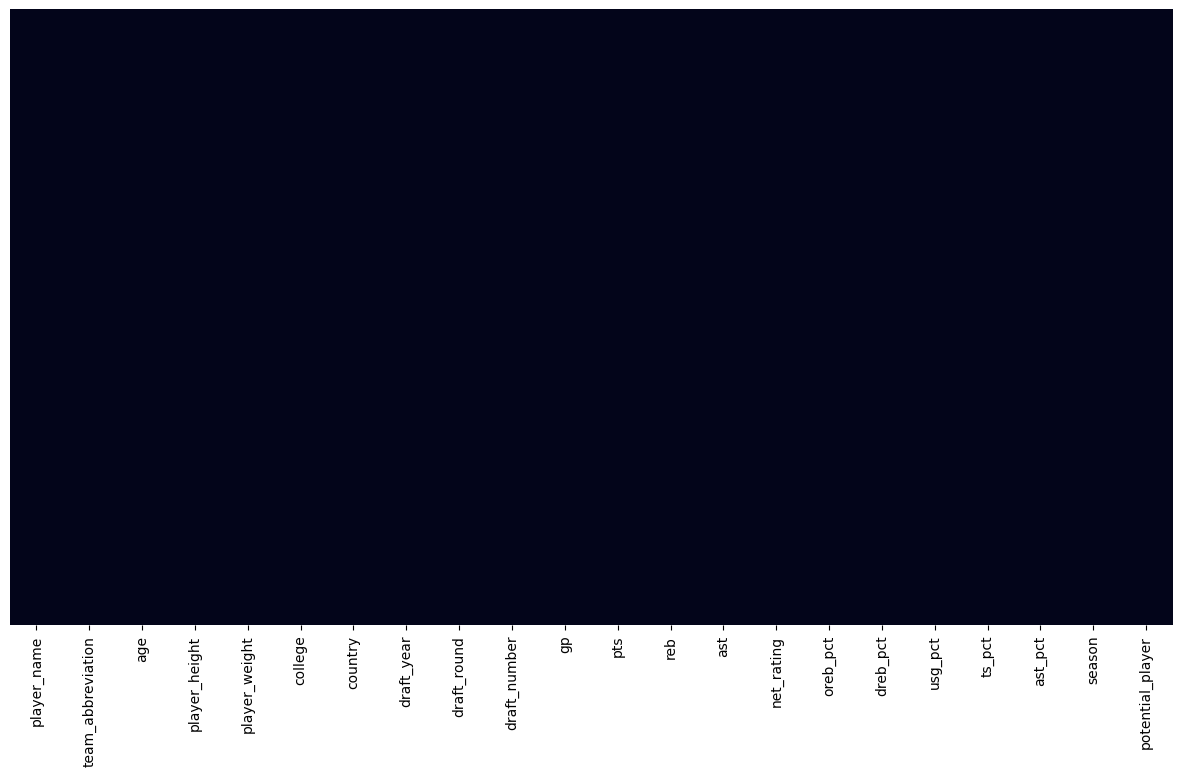

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

Data will undergo further preprocessing phase if needed, but right now, it is ready to go to the next phase, analysis and visualization.

#### 02.04: Mini Data Analysis and Visualization

- Distribution of number of player based on season

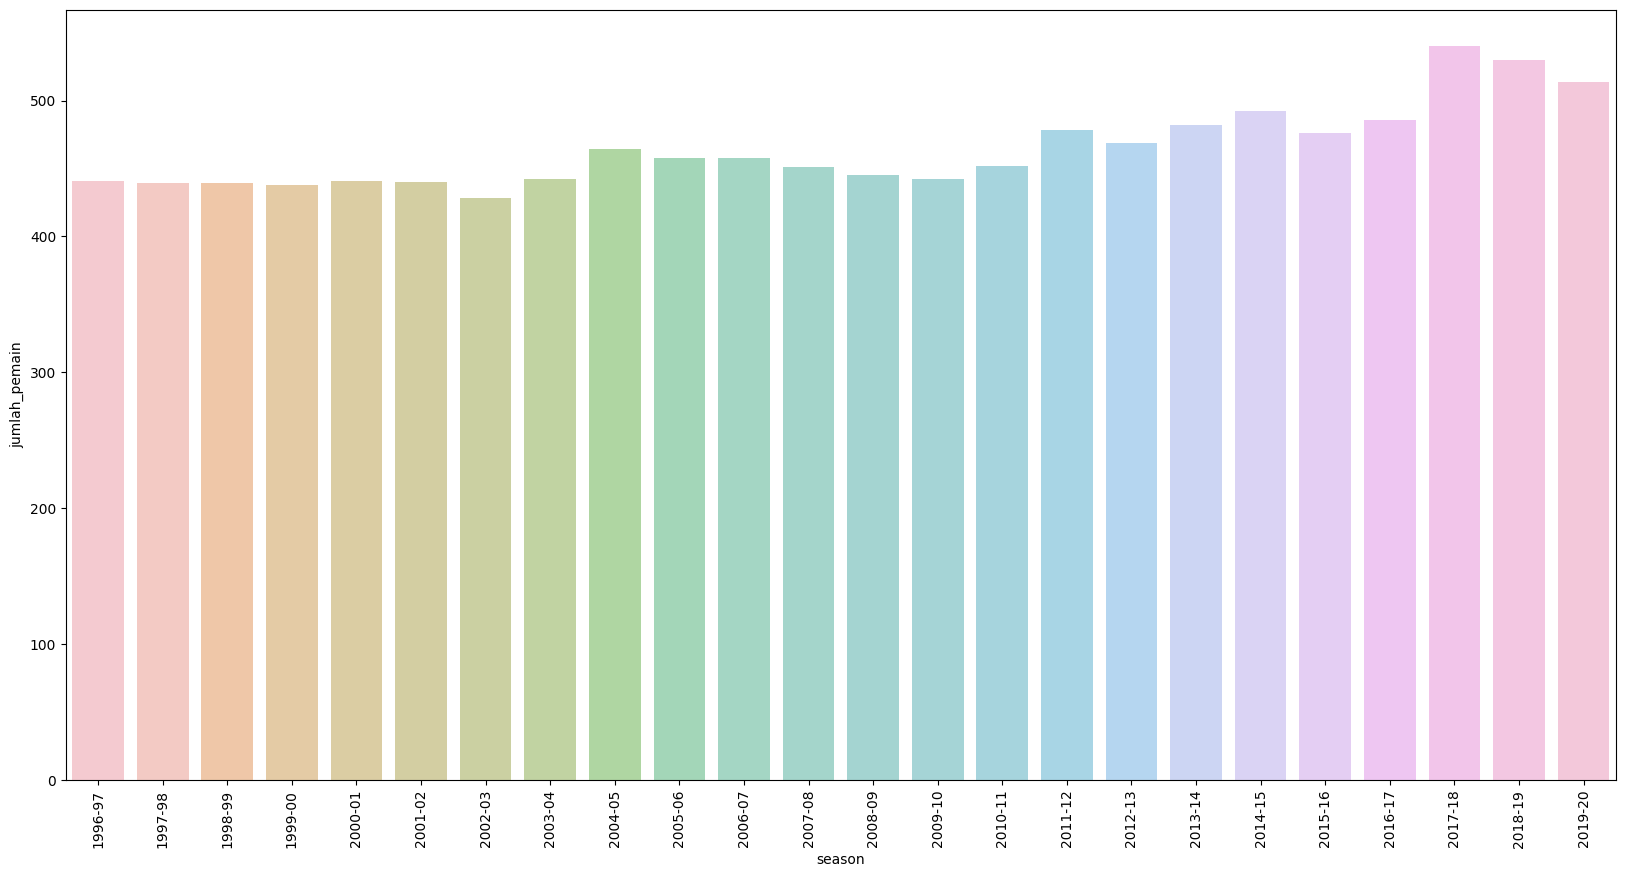

In [12]:
df_distplot_season = df.groupby('season').count()[['player_name']]
df_distplot_season.rename(columns={'player_name':'jumlah_pemain'}, inplace=True)
df_distplot_season.reset_index(inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(x=df_distplot_season['season'], y=df_distplot_season['jumlah_pemain'], alpha=0.5)
plt.xticks(rotation=90)
plt.show()

The bar plot illustrates that there is an increase of number of player in each season throughout the period. The highest number of player throughout these seasons can be found in '2017-18' season.

- Normal Player vs Potential Player Based on Seasons

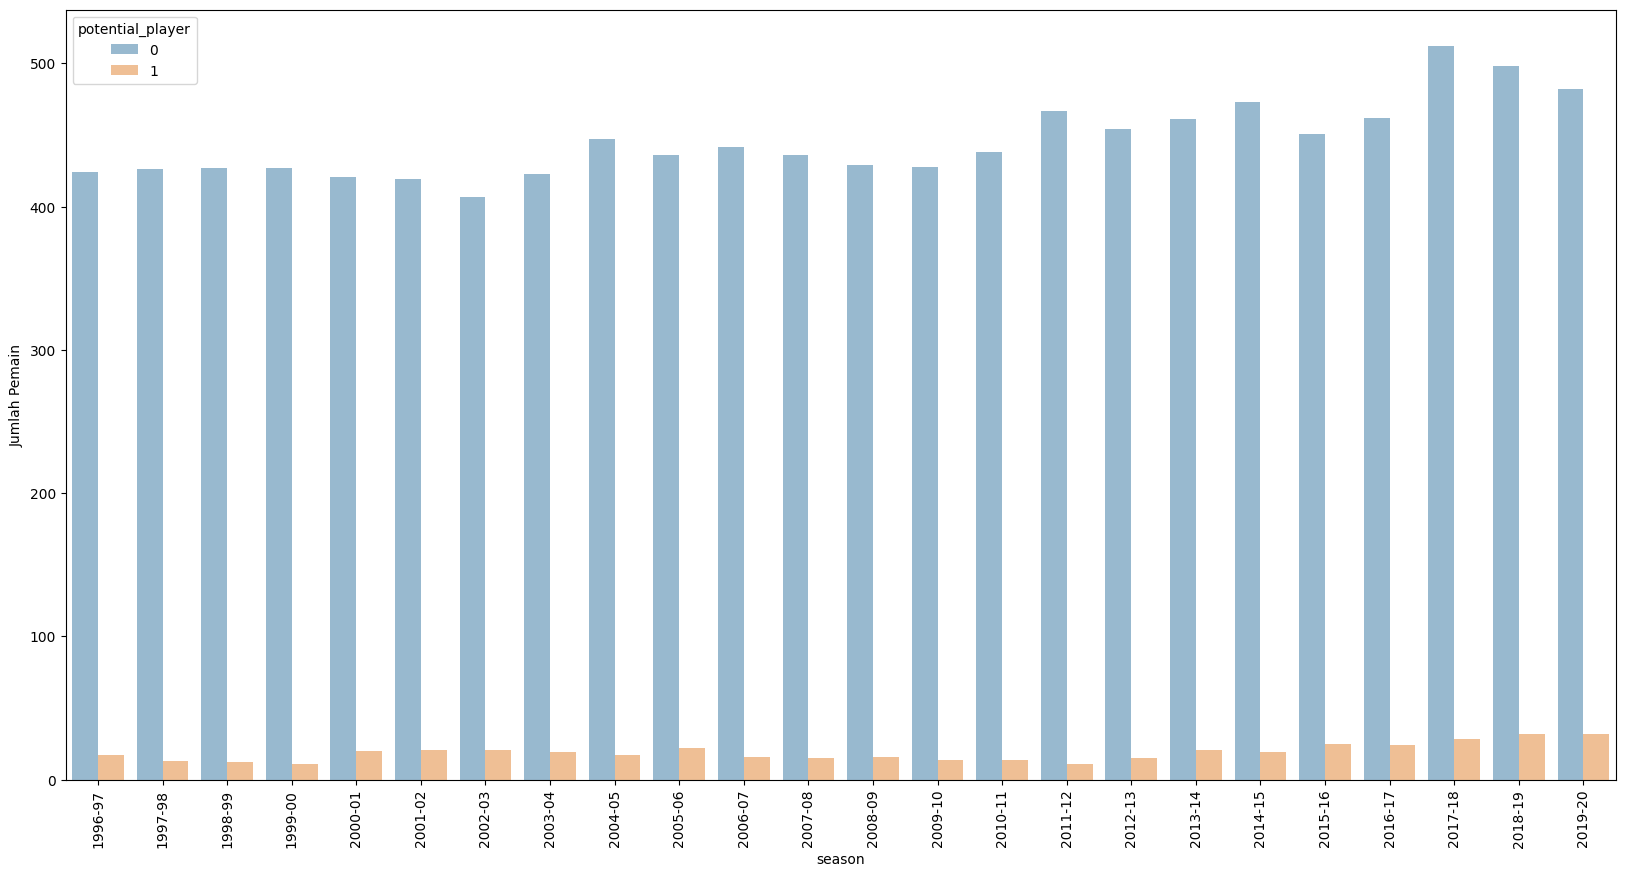

In [13]:
df_distplot_season2 = df.groupby(['season', 'potential_player']).count()

df_potential_season = df_distplot_season2.reset_index()[['season', 'potential_player', 'player_name']]

plt.figure(figsize=(20,10))
sns.barplot(x=df_potential_season['season'], y=df_potential_season['player_name'], hue=df_potential_season['potential_player'], alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('Jumlah Pemain')
plt.show()

Distribution of potential and normal players based on period/ season.

In [14]:
df_pontential = df[df['potential_player']==1]
df_pontential1 = df_pontential[['player_name', 'age', 'player_height', 'player_weight', 'country', 'pts', 'reb', 'ast', 'season']]
df_pontential1.head(3)

,player_name,age,player_height,player_weight,country,pts,reb,ast,season
36,Detlef Schrempf,34.0,208.28,106.59412,USA,16.8,6.5,4.4,1996-97
85,Gary Payton,28.0,193.04,86.18248,USA,21.8,4.6,7.1,1996-97
107,Grant Hill,24.0,203.20,102.05820,USA,21.4,9.0,7.3,1996-97


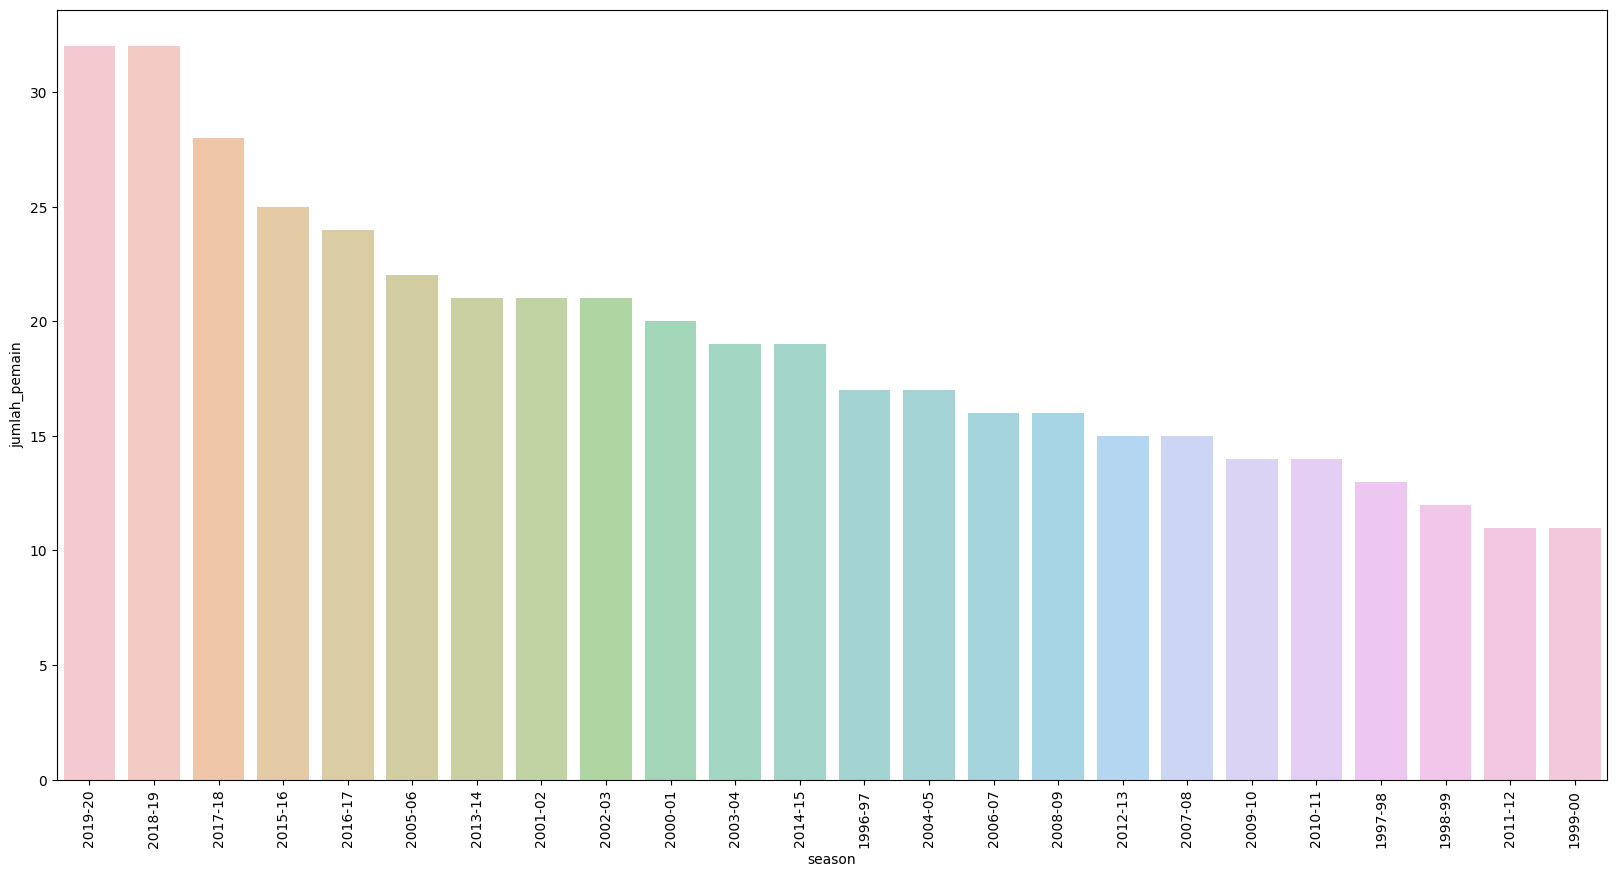

In [15]:
df_season_potential = df_pontential1.groupby('season').count()[['player_name']]
df_season_potential.rename(columns={'player_name':'jumlah_pemain'}, inplace=True)
df_season_potential.reset_index(inplace=True)
df_rank_jumlah_season = df_season_potential.sort_values('jumlah_pemain', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x=df_rank_jumlah_season['season'], y=df_rank_jumlah_season['jumlah_pemain'], alpha=0.5)
plt.xticks(rotation=90)
plt.show()

The bar plot indicates the number of potential player rankings in each season starting from the highest number to the lowest one.

In [16]:
df_pontential1['player_name'].nunique(), df_pontential1['player_name'].count()

(133, 455)

The number of potential player from the dataset is only 133 individuals and it was recorded multiple times throughout these seasons, thus 455 potential players that are in the records of the dataset actually contain duplicated individuals.

- TOP 5 Potential Player with the highest points ('pts')

In [17]:
df_top5_pts = df_pontential1[['player_name', 'pts', 'reb', 'ast', 'age', 'country']].sort_values('pts', ascending=False)[:5]  # checking only

In [18]:
df_player_names0 = df_pontential1.groupby(['player_name', 'age']).mean()
df_player_names0

player_height  player_weight   pts   reb   ast
player_name  age                                                 
Aaron McKie  28.0         195.58      94.800728  11.6  4.10  5.00
             29.0         195.58      94.800728  12.2  4.00  3.70
Al Horford   31.0         208.28     111.130040  14.0  6.80  5.00
             32.0         208.28     111.130040  12.9  7.40  4.70
             33.0         208.28     111.130040  13.6  6.70  4.20
...                          ...            ...   ...   ...   ...
Vince Carter 29.0         198.12      99.790240  24.2  5.80  4.30
             30.0         198.12      99.790240  25.2  6.00  4.80
             31.0         198.12      99.790240  21.3  6.00  5.10
             32.0         198.12      99.790240  20.8  5.10  4.70
Zach LaVine  24.0         196.85      90.718400  24.6  4.75  4.35

[448 rows x 5 columns]

In [19]:
df_player_names_flatten0 = df_player_names0[['pts']].reset_index()
df_player_names_flatten0

,player_name,age,pts
0,Aaron McKie,28.0,11.6
1,Aaron McKie,29.0,12.2
2,Al Horford,31.0,14.0
3,Al Horford,32.0,12.9
4,Al Horford,33.0,13.6
...,...,...,...
443,Vince Carter,29.0,24.2
444,Vince Carter,30.0,25.2
445,Vince Carter,31.0,21.3
446,Vince Carter,32.0,20.8


In [20]:
list_player_names_age0 = [df_player_names_flatten0[df_player_names_flatten0['player_name']==i]['age'].iloc[-1] for i in df_player_names_flatten0['player_name'].unique()]
list_player_names_pts0 = [df_player_names_flatten0[df_player_names_flatten0['player_name']==i]['pts'].iloc[-1] for i in df_player_names_flatten0['player_name'].unique()]
list_player_names0 = [i for i in df_player_names_flatten0['player_name'].unique()]
datas0 = {'player_name': list_player_names0, 'age': list_player_names_age0, 'pts': list_player_names_pts0}

In [21]:
df_latest_player0 = pd.DataFrame(datas0)
df_top_10_latest_player0 = df_latest_player0.sort_values('pts', ascending=False)[:10]
df_top_10_latest_player0

,player_name,age,pts
57,James Harden,30.0,34.50
2,Allen Iverson,30.0,30.70
45,Giannis Antetokounmpo,25.0,29.60
128,Trae Young,21.0,29.40
26,Damian Lillard,29.0,29.00
92,Luka Doncic,21.0,28.40
17,Bradley Beal,26.0,28.05
117,Russell Westbrook,31.0,27.50
120,Stephen Curry,31.0,27.30
75,Kawhi Leonard,28.0,26.90


The table shows the average of top 10 highest players points based on the latest data.

In [22]:
df_top_10_latest_player0.describe()

,age,pts
count,10.000000,10.000000
mean,27.200000,29.135000
std,3.823901,2.218364
min,21.000000,26.900000
25%,25.250000,27.637500
50%,28.500000,28.700000
75%,30.000000,29.550000
max,31.000000,34.500000


The average, minimum, and maximum ages of the top 10 potential players from the latest records are 27, 21, and 31, respectively.

- James Harden development as a basketball player with the highest points throughout the period.

In [23]:
df_james_harden = df_pontential1[df_pontential1['player_name']=='James Harden']
df_james_harden

,player_name,age,player_height,player_weight,country,pts,reb,ast,season
7391,James Harden,23.0,195.58,99.79024,USA,25.9,4.9,5.8,2012-13
7894,James Harden,24.0,195.58,99.79024,USA,25.4,4.7,6.1,2013-14
8430,James Harden,25.0,195.58,102.05820,USA,27.4,5.7,7.0,2014-15
8747,James Harden,26.0,195.58,99.79024,USA,29.0,6.1,7.5,2015-16
9249,James Harden,27.0,195.58,99.79024,USA,29.1,8.1,11.2,2016-17
10003,James Harden,28.0,195.58,99.79024,USA,30.4,5.4,8.8,2017-18
10219,James Harden,29.0,195.58,99.79024,USA,36.1,6.6,7.5,2018-19
10746,James Harden,30.0,195.58,99.79024,USA,34.5,6.4,7.4,2019-20


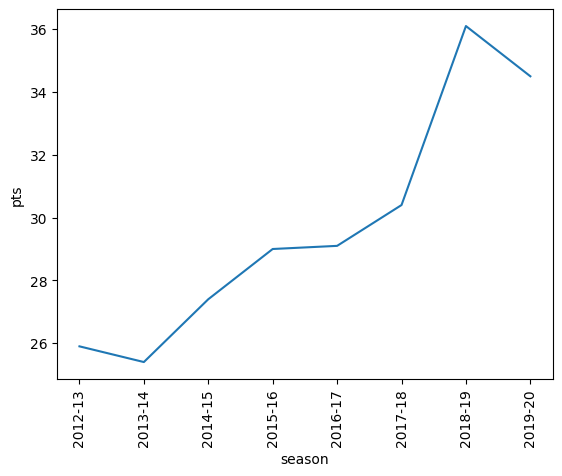

In [24]:
sns.lineplot(x=df_james_harden['season'], y=df_james_harden['pts'])
plt.xticks(rotation=90)
plt.show()

Overall, James Harden performance is getting better and better in each season, however, there was a decline in his performance in 2019-20 season.

- Youngest Player (latest version)

In [25]:
# Creating Table based on player_name and their age

df_player_names = df_pontential1.groupby(['player_name', 'age']).mean()
df_player_names

player_height  player_weight   pts   reb   ast
player_name  age                                                 
Aaron McKie  28.0         195.58      94.800728  11.6  4.10  5.00
             29.0         195.58      94.800728  12.2  4.00  3.70
Al Horford   31.0         208.28     111.130040  14.0  6.80  5.00
             32.0         208.28     111.130040  12.9  7.40  4.70
             33.0         208.28     111.130040  13.6  6.70  4.20
...                          ...            ...   ...   ...   ...
Vince Carter 29.0         198.12      99.790240  24.2  5.80  4.30
             30.0         198.12      99.790240  25.2  6.00  4.80
             31.0         198.12      99.790240  21.3  6.00  5.10
             32.0         198.12      99.790240  20.8  5.10  4.70
Zach LaVine  24.0         196.85      90.718400  24.6  4.75  4.35

[448 rows x 5 columns]

In [26]:
df_player_names_flatten = df_player_names[['pts']].reset_index()
df_player_names_flatten

,player_name,age,pts
0,Aaron McKie,28.0,11.6
1,Aaron McKie,29.0,12.2
2,Al Horford,31.0,14.0
3,Al Horford,32.0,12.9
4,Al Horford,33.0,13.6
...,...,...,...
443,Vince Carter,29.0,24.2
444,Vince Carter,30.0,25.2
445,Vince Carter,31.0,21.3
446,Vince Carter,32.0,20.8


In [27]:
list_player_names_age = [df_player_names_flatten[df_player_names_flatten['player_name']==i]['age'].iloc[-1] for i in df_player_names_flatten['player_name'].unique()]
list_player_names_pts = [df_player_names_flatten[df_player_names_flatten['player_name']==i]['pts'].iloc[-1] for i in df_player_names_flatten['player_name'].unique()]
list_player_names = [i for i in df_player_names_flatten['player_name'].unique()]
datas = {'player_name': list_player_names, 'age': list_player_names_age, 'pts': list_player_names_pts}


In [28]:
df_latest_player = pd.DataFrame(datas)
df_latest_player.sort_values('age')[:10]

,player_name,age,pts
92,Luka Doncic,21.0,28.4
128,Trae Young,21.0,29.4
34,Derrick Rose,22.0,25.0
9,Bam Adebayo,22.0,16.0
56,Jamal Murray,22.0,18.2
29,De'Aaron Fox,22.0,20.3
91,Lonzo Ball,22.0,12.3
32,Delonte West,22.0,11.8
37,Domantas Sabonis,23.0,18.3
36,Devin Booker,23.0,25.9


The table shows the top 10 youngest potential players and their points.

- Luka Doncic development as the youngest potential player.

In [29]:
df_luka_doncic = df_pontential1[df_pontential1['player_name']=='Luka Doncic']
df_luka_doncic

,player_name,age,player_height,player_weight,country,pts,reb,ast,season
10592,Luka Doncic,20.0,200.66,98.883056,Slovenia,21.2,7.8,6.0,2018-19
11080,Luka Doncic,21.0,200.66,104.326160,Slovenia,28.4,9.4,8.7,2019-20


There are only two records of Luka Doncic development, one record is from 2018-19 season and the other one is from 2019-20 season.

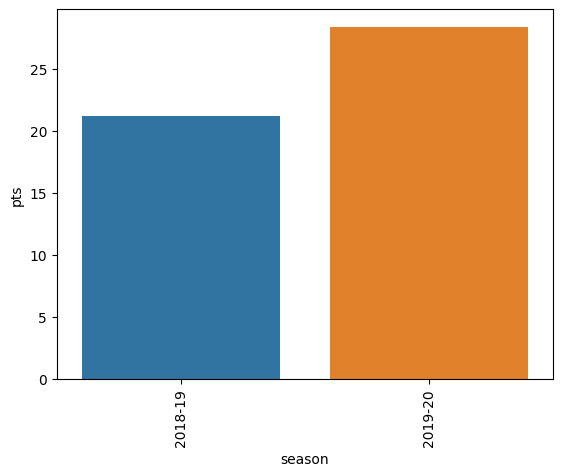

In [30]:
sns.barplot(x=df_luka_doncic['season'], y=df_luka_doncic['pts'])
plt.xticks(rotation=90)
plt.show()

# This bar plot is a little bit useless as it only shows the development of Luka Doncic from two records. 
# Nevertheless, I am still going to show it.

- Potential players only (from the latest records)

In [31]:
df_player_names_all = df.groupby(['player_name', 'age']).mean()
potential_only = df_player_names_all[df_player_names_all['potential_player']==1]
normal_only = df_player_names_all[df_player_names_all['potential_player']==0]

potential_only_flatten = potential_only.reset_index()
normal_only_flatten = normal_only.reset_index()

In [32]:
list_potential_names_age = [potential_only_flatten[potential_only_flatten['player_name']==i]['age'].iloc[-1] for i in potential_only_flatten['player_name'].unique()]
list_potential_names_pts = [potential_only_flatten[potential_only_flatten['player_name']==i]['pts'].iloc[-1] for i in potential_only_flatten['player_name'].unique()]
list_potential_names_height = [potential_only_flatten[potential_only_flatten['player_name']==i]['player_height'].iloc[-1] for i in potential_only_flatten['player_name'].unique()]
list_potential_names_weight = [potential_only_flatten[potential_only_flatten['player_name']==i]['player_weight'].iloc[-1] for i in potential_only_flatten['player_name'].unique()]

list_potential_names = [i for i in potential_only_flatten['player_name'].unique()]

datas_potential_only = {'player_name': list_potential_names, 'age': list_potential_names_age, 'pts': list_potential_names_pts, 'player_height':list_potential_names_height, 'player_weight': list_potential_names_weight}

In [33]:
df_latest_potential_only = pd.DataFrame(datas_potential_only)
display(df_latest_potential_only.sort_values('pts', ascending=False)[:5])
print("The average height of potential players based on the highest points rankings:", df_latest_potential_only.sort_values('pts', ascending=False)[:5]['player_height'].mean(), "\n")

,player_name,age,pts,player_height,player_weight
56,James Harden,30.0,34.5,195.58,99.790240
2,Allen Iverson,30.0,30.7,182.88,74.842680
44,Giannis Antetokounmpo,25.0,29.6,210.82,109.769264
124,Trae Young,21.0,29.4,185.42,81.646560
26,Damian Lillard,29.0,29.0,187.96,88.450440


The average height of potential players based on the highest points rankings: 192.53199999999998 



In [34]:
display(df_latest_potential_only.sort_values('player_height', ascending=False)[:5])
print("The average height of the top 5 highest potential player: ", df_latest_potential_only.sort_values('player_height', ascending=False)[:5]['player_height'].mean(), "\n")

,player_name,age,pts,player_height,player_weight
92,Marc Gasol,34.0,13.6,215.90,115.665960
101,Nikola Jokic,25.0,20.5,213.36,128.820128
103,Pau Gasol,35.0,16.5,213.36,113.398000
16,Brad Miller,30.0,15.0,213.36,118.387512
102,Nikola Vucevic,28.0,20.8,213.36,117.933920


The average height of the top 5 highest potential player:  213.86800000000002 



- Normal players only (from the latest records)

In [35]:
list_normal_names_age = [normal_only_flatten[normal_only_flatten['player_name']==i]['age'].iloc[-1] for i in normal_only_flatten['player_name'].unique()]
list_normal_names_pts = [normal_only_flatten[normal_only_flatten['player_name']==i]['pts'].iloc[-1] for i in normal_only_flatten['player_name'].unique()]
list_normal_names_height = [normal_only_flatten[normal_only_flatten['player_name']==i]['player_height'].iloc[-1] for i in normal_only_flatten['player_name'].unique()]
list_normal_names_weight = [normal_only_flatten[normal_only_flatten['player_name']==i]['player_weight'].iloc[-1] for i in normal_only_flatten['player_name'].unique()]

list_normal_names = [i for i in normal_only_flatten['player_name'].unique()]

datas_normal_only = {'player_name': list_normal_names, 'age': list_normal_names_age, 'pts': list_normal_names_pts, 'player_height':list_normal_names_height, 'player_weight': list_normal_names_weight}

In [36]:
df_latest_normal_only = pd.DataFrame(datas_normal_only)
display(df_latest_normal_only.sort_values('pts', ascending=False)[:5])
print("The average height of normal players based on the highest points rankings:", df_latest_normal_only.sort_values('pts', ascending=False)[:5]['player_height'].mean(), "\n")

,player_name,age,pts,player_height,player_weight
1517,Michael Jordan,35.0,28.70,198.12,97.975872
1244,Kevin Durant,23.0,28.00,205.74,106.594120
517,DeMarcus Cousins,25.0,26.90,210.82,122.469840
114,Anthony Davis,26.0,26.25,208.28,114.758776
1083,Joel Embiid,25.0,25.40,213.36,120.201880


The average height of normal players based on the highest points rankings: 207.26400000000004 



In [37]:
display(df_latest_normal_only.sort_values('player_height', ascending=False)[:5])
print("The average height of the top 5 highest normal player: ", df_latest_normal_only.sort_values('player_height', ascending=False)[:5]['player_height'].mean(), "\n")

,player_name,age,pts,player_height,player_weight
782,Gheorghe Muresan,29.0,3.5,231.14,137.438376
2205,Yao Ming,30.0,10.2,228.60,140.613520
1915,Shawn Bradley,33.0,2.7,228.60,124.737800
1981,Tacko Fall,24.0,3.2,226.06,141.067112
1686,Pavel Podkolzin,21.0,3.0,226.06,117.933920


The average height of the top 5 highest normal player:  228.092 



__The conclusion of the height of potential and normal players:__
__Kesimpulan tinggi potential player vs normal player:__

- Both potential and normal players that have the highest points are shorter than the average highest players in each respective group.
- Player's height is not the only key to the success of the basketball player.

## 03: Creating Binary Classification Models

#### 03.01: Preprocessing

- Dropping useless features

In [38]:
dfml = df.copy()
dfml.drop('player_name', axis=1, inplace=True)

In [39]:
dfml.head()

,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [40]:
dfml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_abbreviation  11145 non-null  object 
 1   age                11145 non-null  float64
 2   player_height      11145 non-null  float64
 3   player_weight      11145 non-null  float64
 4   college            11145 non-null  object 
 5   country            11145 non-null  object 
 6   draft_year         11145 non-null  object 
 7   draft_round        11145 non-null  object 
 8   draft_number       11145 non-null  object 
 9   gp                 11145 non-null  int64  
 10  pts                11145 non-null  float64
 11  reb                11145 non-null  float64
 12  ast                11145 non-null  float64
 13  net_rating         11145 non-null  float64
 14  oreb_pct           11145 non-null  float64
 15  dreb_pct           11145 non-null  float64
 16  usg_pct            111

In [41]:
desc = []
for i in dfml.columns:
    desc.append([i,
                     dfml[i].dtypes,
                     dfml[i].isna().sum(),
                     round((dfml[i].isna().sum())/len(dfml)*100,2),
                     dfml[i].nunique(),
                     dfml[i].drop_duplicates().sample(2).values])
pd.DataFrame(desc, columns = ['dataFeatures', 'dataType',' null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,team_abbreviation,object,0,0.0,36,"[DEN, MIA]"
1,age,float64,0,0.0,27,"[39.0, 37.0]"
2,player_height,float64,0,0.0,30,"[213.36, 195.58]"
3,player_weight,float64,0,0.0,157,"[68.945984, 112.490816]"
4,college,object,0,0.0,316,"[Miami (OH), Navy]"
5,country,object,0,0.0,76,"[Trinidad and Tobago, Croatia]"
6,draft_year,object,0,0.0,45,"[2018, 1980]"
7,draft_round,object,0,0.0,8,"[8, 2]"
8,draft_number,object,0,0.0,75,"[46, 44]"
9,gp,int64,0,0.0,85,"[59, 1]"


In [42]:
# Dropping several features that are useless in the model making process

dfml.drop(['team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'season'], axis=1, inplace=True)


In [43]:
dfml.head(3)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,36.0,198.12,99.79024,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0
1,28.0,215.90,117.93392,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0
2,39.0,205.74,95.25432,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,0


In [44]:
# Selecting features and target

y = dfml['potential_player']
X = dfml.drop('potential_player', axis=1)

In [45]:
X.head(3)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.79024,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.93392,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.25432,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148


In [46]:
y[:5]  # check

0    0
1    0
2    0
3    0
4    0
Name: potential_player, dtype: int64

Text(0.5, 1.0, 'Potential Player(1) vs Normal player(0)')

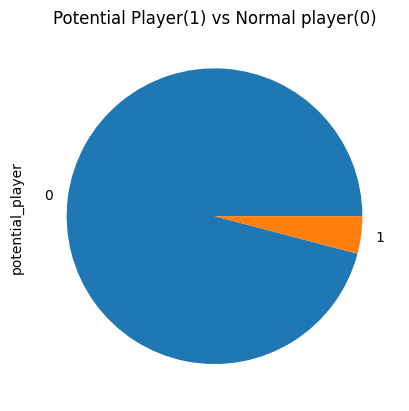

In [47]:
y.value_counts(normalize=True).plot(kind='pie')
plt.title('Potential Player(1) vs Normal player(0)')

In [48]:
# Splitting training-validation set dan testing set

X_train_val, X_test, y_train_val, y_test= train_test_split(X, y, stratify=y, random_state=RANDOM_STATE, test_size=0.2)

In [49]:
y_train_val.value_counts()

0    8552
1     364
Name: potential_player, dtype: int64

In [50]:
y_test.value_counts()

0    2138
1      91
Name: potential_player, dtype: int64

Data has unbalance distribution

In [51]:
# categorical_columns = X.describe(exclude='number').columns  # There is no categorical columns
numerical_columns = X.describe().columns

In [52]:
numerical_columns

Index(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

- __Notes 1:__ The scoring metric for this machine learning model is going to be focused on 'precision'

#### 03.02: Building Benchmark Machine Learning Models

In [53]:
logreg_params = {'random_state': RANDOM_STATE, 'C':10}
logreg = LogisticRegression(**logreg_params)
logreg.get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2021,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [54]:
# Generating Classifier Models
logreg = LogisticRegression(random_state=RANDOM_STATE)
svc = SVC(random_state=RANDOM_STATE, probability=True)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state=RANDOM_STATE)
gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)

In [55]:
# Creating model parameters
logreg_params = {'random_state': RANDOM_STATE}
svc_params = {'random_state': RANDOM_STATE, 'probability':True}
knc_params = {}
rfc_params = {'random_state': RANDOM_STATE}
gbc_params = {'random_state': RANDOM_STATE}

# Creating list of classifier models
models = [
    ('logreg', LogisticRegression, logreg_params),
    ('svc', SVC, svc_params),
    ('knc', KNeighborsClassifier, knc_params),
    ('rfc', RandomForestClassifier, rfc_params),
    ('gbc', GradientBoostingClassifier, gbc_params)
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)

In [56]:
bench_models_score = []

def cv_score(scoring, models):
    for name,algo,param in models:
        model = algo(**param)
        cv_score_mean = cross_val_score(model, X_train_val, y_train_val, cv=cv, scoring=scoring).mean()
        print(f"Mean of {name}'s {scoring} cross validation score: {round(cv_score_mean,5)}")
        bench_models_score.append((name, model, cv_score_mean))

cv_score('precision', models)

Mean of logreg's precision cross validation score: 0.695
Mean of svc's precision cross validation score: 0.0
Mean of knc's precision cross validation score: 0.7329
Mean of rfc's precision cross validation score: 0.9838
Mean of gbc's precision cross validation score: 0.99642


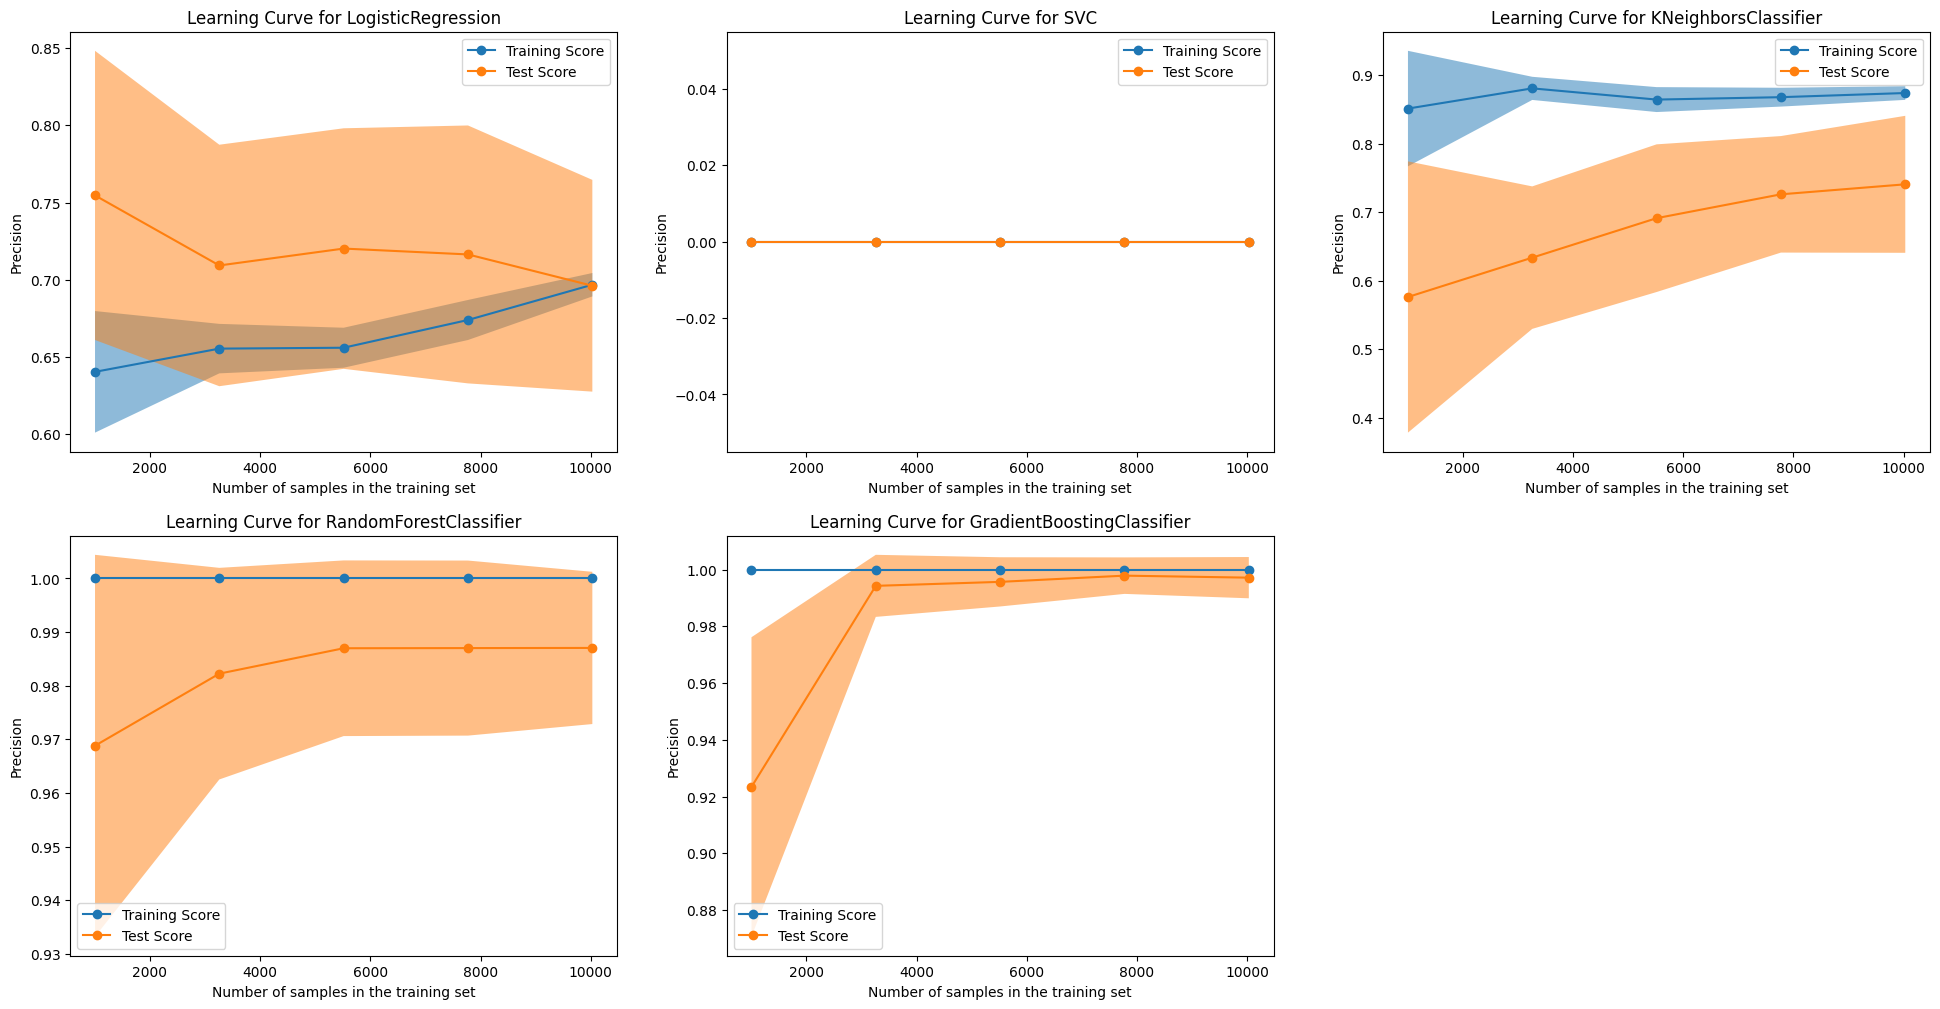

In [57]:
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": cv,
    "score_type": "both",
    "n_jobs": 12,
    "line_kw": {"marker": "o"},
    "scoring": "precision",
}

plt.figure(figsize=(24, 12))
for idx, estimator in enumerate([logreg, svc, knc, rfc, gbc]):
    
    ax = plt.subplot(2,3,idx+1)
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {estimator.__class__.__name__}")

It can be seen from line plots above that certain models have performed admirably. Models such as the Random Forest Classifier and Gradient Boosting Classifier have delivered strong results. On the other hand, the Logistic Regression and KNeighbour Classifier models perform reasonably well with precision scores of approximately 69% and 73%, respectively, while the SVC performs poorly with a precision score of 0. Furthermore, it is interesting to note that the logistic regression model performs better on the testing set than on the training set.

The top-performing benchmark model is the Gradient Boost Classifier, boasting a precision cross-validation score of 0.9964. **Next, I am going to tune each of the models, except for the Gradient Boosting Classifier, as it has already achieved a remarkable score.**

*Note: Some models easily achieve high scores, likely because the dataset itself is relatively small, consisting of just a few thousand rows. In real-world scenarios with datasets in the millions, the actual model performance does not always match the cross-validation score.

#### 03.03: Creating Tuned Machine Learning Models

> 03.03A: Tuning Logistic Regression Model

In [58]:
# logreg_pipe.get_params()  # Checking the available parameters for tuning

In [59]:
# Logistic regression column transformer for standard scaling the columns
logreg_trans = ColumnTransformer([
    ('stdScaler', StandardScaler(), X.columns.values)
], remainder='passthrough')

logreg_pipe = Pipeline([
    ('transformer', logreg_trans), 
    ('clf', logreg)
])

logreg_hparam = {
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__penalty': ['l1', 'l2','elasticnet'],
    'clf__solver': ['liblinear', 'newton-cg']
}

logreg_gridSearch = GridSearchCV(
    logreg_pipe,
    param_grid=logreg_hparam,
    cv=cv,
    scoring='precision',
    n_jobs =-1,
    verbose=1
)

logreg_gridSearch.fit(X_train_val, y_train_val)

Fitting 30 folds for each of 36 candidates, totalling 1080 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=2021),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('stdScaler',
                                                                         StandardScaler(),
                                                                         array(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'], dtype=object))])),
                                       ('clf',
                                        LogisticRegression(random_state=2021))]),
             n_jobs=-1,
             param_grid={'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'clf__solver': ['liblinear', 'newton-cg']},
             scoring='precision', verbose=1)

In [60]:
print(f"Logistic Regression Best Parameters: {logreg_gridSearch.best_params_}")
logreg_tuned_cv = cross_val_score(logreg_gridSearch.best_estimator_, X_train_val, y_train_val, cv=cv, scoring='precision')

Logistic Regression Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}


In [61]:
# Creating a function to plot learning curve
def plot_learningCurve(model, model_name: str, score: str):
    common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": cv,
    "score_type": "both",
    "n_jobs": 12,
    "line_kw": {"marker": "o"},
    "scoring": score,
    }
    
    ax = plt.subplot(1,1,1)
    LearningCurveDisplay.from_estimator(model, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {model_name}")
    plt.show()

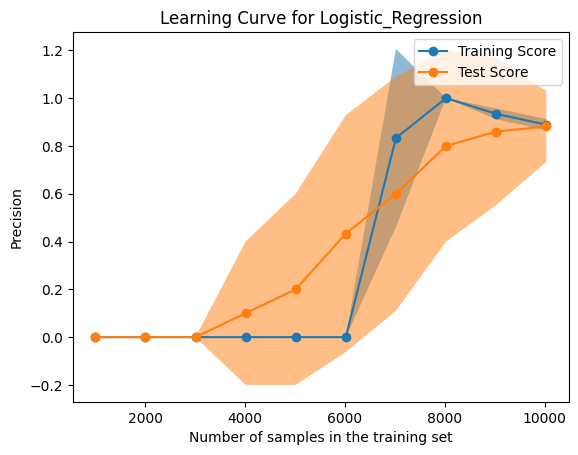

In [62]:
plot_learningCurve(logreg_gridSearch.best_estimator_, 'Logistic_Regression', 'precision')

In [63]:
print(f"The {bench_models_score[0][0]} benchmark model's precision cross validation score: {round(bench_models_score[0][2],5)}")
print(f"The {bench_models_score[0][0]} tuned model's precision cross validation score: {round(logreg_tuned_cv.mean(),5)}")

The logreg benchmark model's precision cross validation score: 0.695
The logreg tuned model's precision cross validation score: 0.93333


**Findings:** The tuned version of the Logistic Regression model performs **better** than the benchmark version.

In [64]:
logreg_gridSearch.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stdScaler', StandardScaler(),
                                                  array(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'], dtype=object))])),
                ('clf',
                 LogisticRegression(C=0.001, random_state=2021,
                                    solver='newton-cg'))])

In [65]:
# Creating list of tuned models
tuned_models_score = [
    ('logreg', logreg_gridSearch.best_estimator_, logreg_tuned_cv.mean())
]

> 03.03B: Tuning Support Vector Machine Model

In [66]:
# svc_pipe.get_params()  # Checking the available parameters for tuning

In [67]:
# SVC column transformer for standard scaling the columns
svc_trans = ColumnTransformer([
    ('stdScaler', StandardScaler(), X.columns.values)
], remainder='passthrough')

svc_pipe = Pipeline([
    ('transformer', svc_trans), 
    ('clf', svc)
])

svc_hparam = {
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__gamma': ['scale', 1, 0.1, 0.01, 0.01, 0.0001],
    'clf__kernel': ['rbf', 'poly', 'sigmoid'],
    'clf__probability': [True]
}

svc_gridSearch = GridSearchCV(
    svc_pipe,
    param_grid=svc_hparam,
    cv=cv,
    scoring='precision',
    n_jobs =-1,
    verbose=1
)

svc_gridSearch.fit(X_train_val, y_train_val)

Fitting 30 folds for each of 108 candidates, totalling 3240 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=2021),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('stdScaler',
                                                                         StandardScaler(),
                                                                         array(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'], dtype=object))])),
                                       ('clf',
                                        SVC(probability=True,
                                            random_state=2021))]),
             n_jobs=-1,
             param_grid={'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__gamma': ['scale', 1, 0.1, 0.01, 0.01, 0.0001],
                         'clf__kernel': ['rbf', 'poly', 'sigmoid'],
                         'clf__probability': [True]},
             scoring='precision', verbose=1)

In [68]:
print(f"SVC Best Parameters: {svc_gridSearch.best_params_}")
svc_tuned_cv = cross_val_score(svc_gridSearch.best_estimator_, X_train_val, y_train_val, cv=cv, scoring='precision')

SVC Best Parameters: {'clf__C': 0.1, 'clf__gamma': 0.1, 'clf__kernel': 'rbf', 'clf__probability': True}


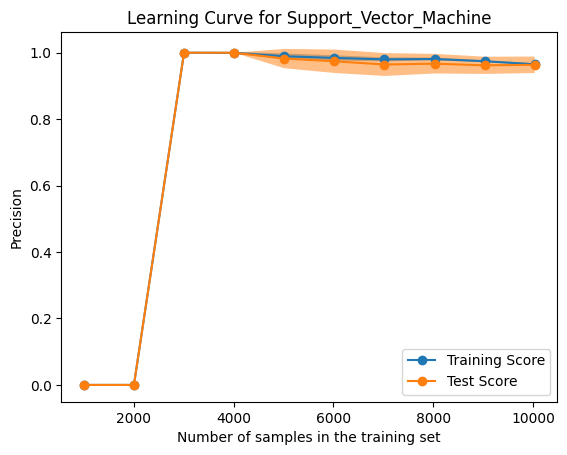

In [69]:
plot_learningCurve(svc_gridSearch.best_estimator_, 'Support_Vector_Machine', 'precision')

In [70]:
print(f"The {bench_models_score[1][0]} benchmark model's precision cross validation score: {round(bench_models_score[1][2],5)}")
print(f"The {bench_models_score[1][0]} tuned model's precision cross validation score: {round(svc_tuned_cv.mean(),5)}")

The svc benchmark model's precision cross validation score: 0.0
The svc tuned model's precision cross validation score: 0.96073


**Findings:** The tuned version of the Support Vector Machine model performs **much better** than the benchmark version.

In [71]:
tuned_models_score.append(('svc', svc_gridSearch.best_estimator_, svc_tuned_cv.mean()))

> 03.03C: Tuning KNeighbors Classifier Model

In [72]:
# knc_pipe.get_params()  # Checking the available parameters for tuning

In [73]:
# SVC column transformer for standard scaling the columns
knc_trans = ColumnTransformer([
    ('stdScaler', StandardScaler(), X.columns.values)
], remainder='passthrough')

knc_pipe = Pipeline([
    ('transformer', knc_trans), 
    ('clf', knc)
])

knc_hparam = {
    'clf__n_neighbors':[3, 5, 7, 9, 11, 13, 15],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['minkowski','euclidean','manhattan']
}

knc_gridSearch = GridSearchCV(
    knc_pipe,
    param_grid=knc_hparam,
    cv=cv,
    scoring='precision',
    n_jobs =-1,
    verbose=1
)

knc_gridSearch.fit(X_train_val, y_train_val)

Fitting 30 folds for each of 42 candidates, totalling 1260 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=2021),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('stdScaler',
                                                                         StandardScaler(),
                                                                         array(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'], dtype=object))])),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__metric': ['minkowski', 'euclidean', 'manhattan'],
                         'clf__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'clf__weights': ['uniform', 'distance']},
             scoring='precision', verbose=1)

In [74]:
print(f"KNC Best Parameters: {knc_gridSearch.best_params_}")
knc_tuned_cv = cross_val_score(knc_gridSearch.best_estimator_, X_train_val, y_train_val, cv=cv, scoring='precision')

KNC Best Parameters: {'clf__metric': 'manhattan', 'clf__n_neighbors': 15, 'clf__weights': 'uniform'}


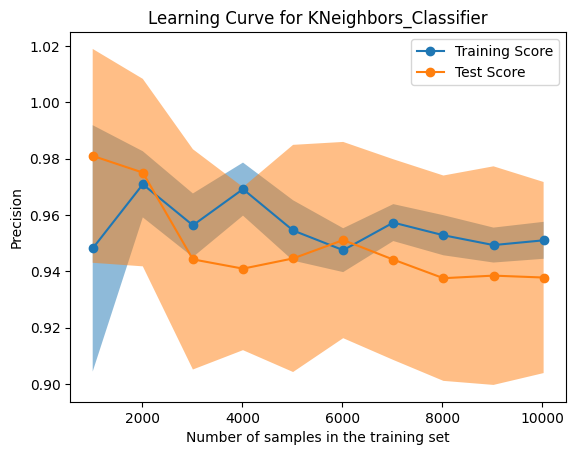

In [75]:
plot_learningCurve(knc_gridSearch.best_estimator_, 'KNeighbors_Classifier', 'precision')

In [76]:
print(f"The {bench_models_score[2][0]} benchmark model's precision cross validation score: {round(bench_models_score[2][2],5)}")
print(f"The {bench_models_score[2][0]} tuned model's precision cross validation score: {round(knc_tuned_cv.mean(),5)}")

The knc benchmark model's precision cross validation score: 0.7329
The knc tuned model's precision cross validation score: 0.92822


**Findings:** The tuned version of the KNeighbors Classifier model performs **better** than the benchmark version.

In [77]:
tuned_models_score.append(('knc', knc_gridSearch.best_estimator_, knc_tuned_cv.mean()))

> 03.03D: Tuning Random Forest Classifier Model

In [78]:
# rfc_pipe.get_params()  # Checking the available parameters for tuning

In [79]:
(np.linspace(10,150,5))

array([ 10.,  45.,  80., 115., 150.])

In [80]:
# Random forest does not need scaling
rfc_pipe = Pipeline([
    ('clf', rfc)
])

rfc_hparam = {
    'clf__max_depth': [int(i) for i in np.linspace(10,150, 5)],
    'clf__min_samples_split' : [2, 4],
    'clf__min_samples_leaf' : [1, 3],
    'clf__n_estimators' : [int(i) for i in np.linspace(100,2000,5)]
}

rfc_gridSearch = GridSearchCV(
    rfc_pipe,
    param_grid=rfc_hparam,
    cv=cv,
    scoring='precision',
    n_jobs =-1,
    verbose=1
)

rfc_gridSearch.fit(X_train_val, y_train_val)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=2021),
             estimator=Pipeline(steps=[('clf',
                                        RandomForestClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [10, 45, 80, 115, 150],
                         'clf__min_samples_leaf': [1, 3],
                         'clf__min_samples_split': [2, 4],
                         'clf__n_estimators': [100, 575, 1050, 1525, 2000]},
             scoring='precision', verbose=1)

In [81]:
print(f"rfC Best Parameters: {rfc_gridSearch.best_params_}")
rfc_tuned_cv = cross_val_score(rfc_gridSearch.best_estimator_, X_train_val, y_train_val, cv=cv, scoring='precision')

rfC Best Parameters: {'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__n_estimators': 100}


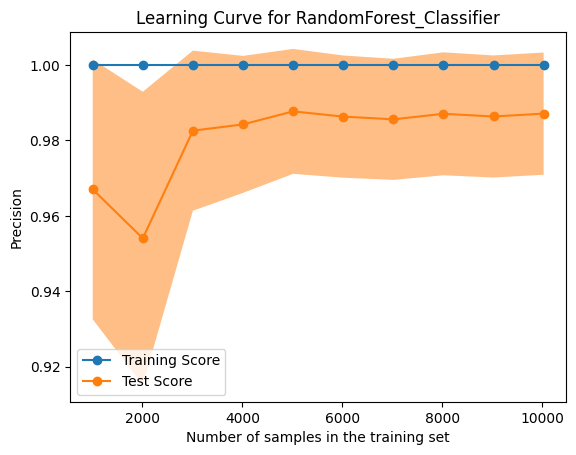

In [82]:
plot_learningCurve(rfc_gridSearch.best_estimator_, 'RandomForest_Classifier', 'precision')

In [83]:
print(f"The {bench_models_score[3][0]} benchmark model's precision cross validation score: {round(bench_models_score[3][2],5)}")
print(f"The {bench_models_score[3][0]} tuned model's precision cross validation score: {round(rfc_tuned_cv.mean(),5)}")

The rfc benchmark model's precision cross validation score: 0.9838
The rfc tuned model's precision cross validation score: 0.98484


**Findings:** The tuned version of the Random Forest Classifier model performs **slightly better** than the benchmark version.  The tuned version of the random forest classifier is **not particularly effective** because it takes a significant amount of time to fit the tuned model, yielding only marginal improvements.

In [84]:
tuned_models_score.append(('rfc', rfc_gridSearch.best_estimator_, rfc_tuned_cv.mean()))

**I am going to create a summary of benchmark models as well as tuned models that have been developed thus far.**

In [85]:
bench_df = pd.DataFrame([round(i[2],5) for i in bench_models_score], index=[i[0] for i in bench_models_score], columns=['benchmark'])
tuned_df = pd.DataFrame([round(i[2],5) for i in tuned_models_score], index=[i[0] for i in tuned_models_score], columns=['tuned'])

model_initSummary_df = bench_df.join(tuned_df).copy()
model_initSummary_df

,benchmark,tuned
logreg,0.69500,0.93333
svc,0.00000,0.96073
knc,0.73290,0.92822
rfc,0.98380,0.98484
gbc,0.99642,NaN


> 03.03E: Creating Final Classifier Model

In [141]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
highlighted_df = model_initSummary_df.style.highlight_max(axis=1, props='color:white; font-weight:bold; background-color:green;')
highlighted_df

,benchmark,tuned
logreg,0.695000,0.933330
svc,0.000000,0.960730
knc,0.732900,0.928220
rfc,0.983800,0.984840
gbc,0.996420,nan


The models highlighted in green will be combined using a voting classifier, specifically employing "soft" voting to combine them. Soft voting will integrate these models based on their prediction probabilities.

In [143]:
# dfi.export(highlighted_df, "pic/highlighted_df.png")  # Exporting DataFrame Image for Mark Down

In [87]:
tuned_models_score[0][1]

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stdScaler', StandardScaler(),
                                                  array(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'], dtype=object))])),
                ('clf',
                 LogisticRegression(C=0.001, random_state=2021,
                                    solver='newton-cg'))])

In [127]:
vc = VotingClassifier([
    ('logreg', tuned_models_score[0][1]), 
    ('svc', tuned_models_score[1][1]), 
    ('knc', tuned_models_score[2][1]),
    ('rfc', tuned_models_score[3][1]),
    ('gbc', bench_models_score[4][1]),
], voting='soft')

In [128]:
vc.fit(X_train_val, y_train_val)

VotingClassifier(estimators=[('logreg',
                              Pipeline(steps=[('transformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('stdScaler',
                                                                                StandardScaler(),
                                                                                array(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'], dtype=object))])),
                                              ('clf',
                                               LogisticRegression(C=0.001,
                                                                  random_st...
                                                                                array(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'], dtype=object))])),
                                              ('clf',
                                               KNeighborsClassifier(metric='manhattan',
                                                                    n_neighbors=15))])),
                             ('rfc',
                              Pipeline(steps=[('clf',
                                               RandomForestClassifier(max_depth=10,
                                                                      min_samples_split=4,
                                                                      random_state=2021))])),
                             ('gbc',
                              GradientBoostingClassifier(random_state=2021))],
                 voting='soft')

In [129]:
y_pred = vc.predict(X_test)
y_pred_proba = vc.predict_proba(X_test)

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2138
           1       1.00      0.86      0.92        91

    accuracy                           0.99      2229
   macro avg       1.00      0.93      0.96      2229
weighted avg       0.99      0.99      0.99      2229



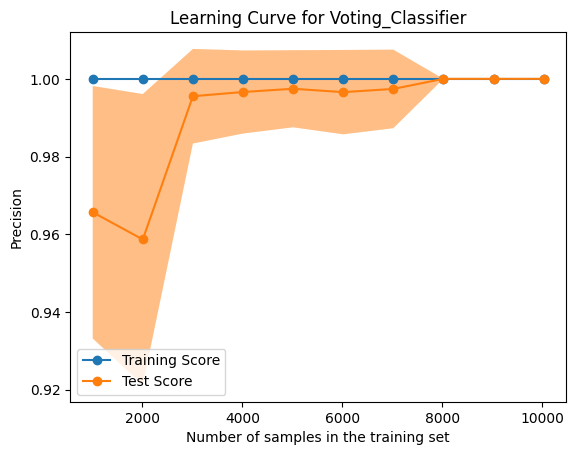

In [132]:
plot_learningCurve(vc, 'Voting_Classifier', 'precision')

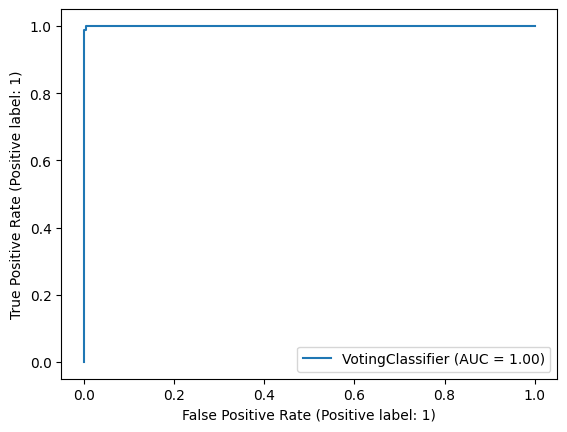

In [131]:
RocCurveDisplay.from_estimator(vc, X_test, y_test)

In [115]:
print(f"The Area under the curve (AUC) for this final model: {round(roc_auc_score(y_test, y_pred_proba[:,1]),5)}")

The Area under the curve (AUC) for this final model: 0.99993


Notes: 
- In this specific case and dataset, our final model has achieved almost zero misclassifications. This level of accuracy is attainable because the dataset is relatively small, and we have combined tuned models using a voting classifier. In different scenarios, we might opt to combine several benchmark models using the voting classifier instead of the tuned versions to prevent overfitting. However, for this instance, I have chosen to combine the tuned models as an exercise in model tuning.
- The AUC score ranges from 0.5 to 1.0. A score of 0.5 indicates a model that performs random guessing, while a score of 1.0 indicates a model that performs classification exceptionally well, with no errors.

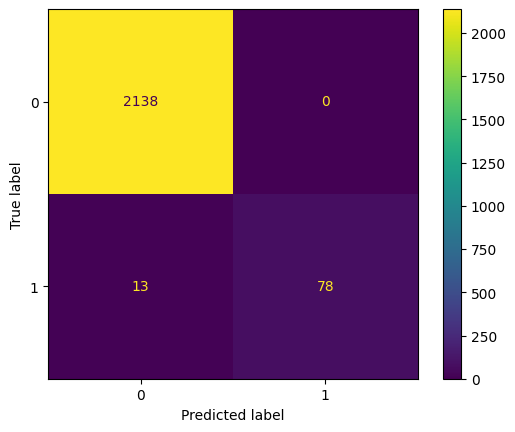

In [137]:
ConfusionMatrixDisplay.from_estimator(vc, X_test, y_test)

**Conclusion:** It can be observed from the confusion matrix above that our models perform well with only **13 misclassifications** out of a total of 2229 players, all of which are classified as false negatives. As a result, the final model achieves a 0% False Positive Rate and a 0.143% False Negative Rate.

The false negative rate implies that we have misclassified potential players as individuals who are not potential, leading us to decide not to hire them. On the other hand, the false positive rate indicates that we have misclassified underperforming players as potential candidates, resulting in our decision to hire them.

In this scenario, it is assumed that having a **higher false negative rate is preferable**, as hiring underperforming individuals can lead to more significant costs.

#### 03.04: Predicting New Basketball Players

In [116]:
df_test = pd.read_csv('new_players.csv')
df_test.head()

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


In [119]:
X_test_final = df_test[X.columns]
X_test_final.head(3)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,37.0,205.74,104.326160,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,33.0,160.02,63.956472,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,27.0,193.04,95.254320,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250


In [120]:
vc.fit(X, y)  # Fitting all the datasets we have to predict a new dataset that the models have not seen.

VotingClassifier(estimators=[('logreg',
                              Pipeline(steps=[('transformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('stdScaler',
                                                                                StandardScaler(),
                                                                                array(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'], dtype=object))])),
                                              ('clf',
                                               LogisticRegression(C=0.001,
                                                                  random_st...
                                                                                array(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'], dtype=object))])),
                                              ('clf',
                                               KNeighborsClassifier(metric='manhattan',
                                                                    n_neighbors=15))])),
                             ('rfc',
                              Pipeline(steps=[('clf',
                                               RandomForestClassifier(max_depth=10,
                                                                      min_samples_split=4,
                                                                      random_state=2021))])),
                             ('gbc',
                              GradientBoostingClassifier(random_state=2021))],
                 voting='soft')

In [122]:
y_pred_final = vc.predict(X_test_final)

In [125]:
df_test_prediction = df_test.copy()
df_test_prediction['prediction'] = y_pred_final
df_test_prediction.head(3)

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,prediction
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1


> **Summary** - These are the potential players we need to recruit based on our final model:

In [124]:
df_test_prediction_RECRUIT = df_test_prediction[df_test_prediction['prediction']==1]
df_test_prediction_RECRUIT

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,prediction
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1
7,7,8,27.0,200.66,99.790240,Southern California,USA,74,27.3,5.2,3.9,3.3,0.030,0.134,0.342,0.552,0.204,1
31,31,32,21.0,198.12,95.254320,Kentucky,USA,54,24.9,4.5,4.7,-9.3,0.013,0.112,0.301,0.561,0.233,1
62,62,63,24.0,198.12,95.707912,Washington,USA,78,22.6,4.7,5.1,8.9,0.044,0.115,0.274,0.573,0.243,1
72,72,73,27.0,200.66,97.522280,Wisconsin,USA,82,22.6,6.3,5.3,0.0,0.038,0.121,0.252,0.522,0.213,1
151,151,152,26.0,198.12,93.893544,Arizona,USA,82,17.1,6.5,5.8,-4.3,0.030,0.168,0.218,0.535,0.238,1
153,153,154,28.0,187.96,90.718400,Utah,USA,82,14.8,4.5,6.1,2.5,0.051,0.097,0.206,0.541,0.283,1
165,165,166,26.0,195.58,83.460928,Saint Louis,USA,61,22.0,6.3,4.7,2.8,0.034,0.151,0.264,0.523,0.214,1
184,184,185,24.0,203.20,102.058200,Duke,USA,80,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1
224,224,225,29.0,203.20,98.429464,Michigan,USA,83,20.4,4.5,4.3,-2.1,0.016,0.117,0.260,0.528,0.203,1
